## Подготовка данных

### Загрузка и изучение данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
full.shape, train.shape, test.shape

((19439, 87), (14149, 87), (5290, 53))

Изучив данные, можно сказать, что у нас имеется полный датасет с признаками, а также этот же датасет разбитый на обучающую и тестовую выборки в соотношении примерно 73:27, записанный в отдельные датасеты. В тестовой выборке отсутствуют 34 признака, среди которых есть целевые. Все признаки являются вещественными числами. Целевыми признаками являются столбцы 'final.output.recovery' и 'rougher.output.recovery'. Столбец date имеет тип данных object и не является значимым признаком для обучения модели.

### Проверка расчета эффективности обогащения

In [10]:
# C — доля золота в концентрате после флотации/очистки
c = train['rougher.output.concentrate_au']
# F — доля золота в сырье/концентрате до флотации/очистки
f = train['rougher.input.feed_au']
# T — доля золота в отвальных хвостах после флотации/очистки
t = train['rougher.output.tail_au']

control_recovery = ((c * (f - t)) / (f * (c - t))) * 100
display(control_recovery.head(), train['rougher.output.recovery'].head())
print('MAE = ', mean_absolute_error(train['rougher.output.recovery'], control_recovery))

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

MAE =  9.73512347450521e-15


Видим, что эффективность обогащения рассчитана правильно. Средняя абсолютная ошибка незначительна, значения разнятся лишь на 15 знаке после запятой.

### Анализ празнаков, недоступных в тестовой выборке

In [11]:
# получим список пропущенных в тестовой выборке столбцов
list_columns = []
for i in train.columns:
    if i not in test.columns:
        list_columns.append(i)

print(len(list_columns))
list_columns

34


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Пропущено 34 признака, 30 их которых являются параметрами продукта и 4 - расчетными характеристиками. Причина отсутвия некоторых параметров, как сказано в описании проекта, связана с тем, что они замеряются и/или рассчитываются значительно позже. Эти признаки необходимо удалить из обучающей выборки, за исключением целевых признаков, потому что иначе мы не сможем провести тест.

### Предобработка данных

In [12]:
# подготовим список столбцов, которые небходимо удалить из тренировочной выборки

list_columns.remove('final.output.recovery')
list_columns.remove('rougher.output.recovery')
len(list_columns)

32

In [13]:
# удалим столбцы и проверим оставшееся количество столбцов в тренировочной выборке

print(train.shape)
train = train.drop(list_columns, axis=1)
print(train.shape)

(14149, 87)
(14149, 55)


In [14]:
# вытащим из полного датасета целевой признак для тестовой выборки
# путем объединения датасетов

print(test.shape)
test = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], left_on = 'date', right_on = 'date', how='left')
print(test.shape)

(5290, 53)
(5290, 55)


In [15]:
test.tail(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
5287,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759
5288,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,92.599042,68.061186
5289,2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937,91.177695,71.699976


In [16]:
train.isna().sum().sort_values(ascending=False)

rougher.state.floatbank10_e_air               436
rougher.input.floatbank11_xanthate            428
secondary_cleaner.state.floatbank2_a_air      217
rougher.input.feed_size                       144
rougher.input.feed_pb                         100
primary_cleaner.input.xanthate                100
rougher.input.feed_sol                         78
rougher.input.floatbank11_sulfate              36
primary_cleaner.input.depressant               32
rougher.input.floatbank10_sulfate              29
secondary_cleaner.state.floatbank2_b_air       21
primary_cleaner.input.sulfate                  20
rougher.input.feed_rate                         8
rougher.input.floatbank10_xanthate              8
secondary_cleaner.state.floatbank4_a_air        6
secondary_cleaner.state.floatbank3_a_air        4
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_c_air          2


In [17]:
test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.state.floatbank2_a_level     0
rougher.state.floatbank10_f_level              0
secondary_cleaner.state.floatbank2_b_level     0
date                                           0
rougher.state.floatbank10_e_level              0
secondary_cleaner.st

Имеется некоторое количество пропусков, причина появления которых неизвестна. Можно предположить ошибки в датчиках, которые передают данные. Чтобы не исказить данные, применим метод форвардной заливки для заполнения пропусков для всех трех датасетов.

In [18]:
# заполним пропуски предыдущим известным значением
full = full.fillna(method='ffill')
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

In [19]:
full.isna().sum().sum(), train.isna().sum().sum(), test.isna().sum().sum()

(0, 0, 0)

## Анализ данных

### Анализ изменения концентрации металлов на различных этапах очистки

In [20]:
# проанализируем, как изменялась концентрация золота, серебра и свинца 
# до флотации, после флотации, после перивичной очистки и после вторичной очистки

print('Концентрация золота:')
print('до флотации =', full['rougher.input.feed_au'].mean().round(2), 
      'после флотации =', full['rougher.output.concentrate_au'].mean().round(2),
      'после первой очистки =', full['primary_cleaner.output.concentrate_au'].mean().round(2),
      'после второй очистки = ', full['final.output.concentrate_au'].mean().round(2), sep="\n"
    )

print()
print('Концентрация серебра:')
print('до флотации =', full['rougher.input.feed_ag'].mean().round(2), 
      'после флотации =', full['rougher.output.concentrate_ag'].mean().round(2),
      'после первой очистки =', full['primary_cleaner.output.concentrate_ag'].mean().round(2),
      'после второй очистки =', full['final.output.concentrate_ag'].mean().round(2), sep="\n"
    )

print()
print('Концентрация свинца:')
print('до флотации =', full['rougher.input.feed_pb'].mean().round(2), 
      'после флотации =', full['rougher.output.concentrate_pb'].mean().round(2),
      'после первой очистки =', full['primary_cleaner.output.concentrate_pb'].mean().round(2),
      'после второй очистки =', full['final.output.concentrate_pb'].mean().round(2), sep="\n"
    )

Концентрация золота:
до флотации =
8.27
после флотации =
19.77
после первой очистки =
32.12
после второй очистки = 
44.08

Концентрация серебра:
до флотации =
8.79
после флотации =
11.99
после первой очистки =
8.44
после второй очистки =
5.17

Концентрация свинца:
до флотации =
3.59
после флотации =
7.61
после первой очистки =
9.81
после второй очистки =
9.98


Можно заметить, что средняя концентрация золота и свинца растет, а средняя концентрация серебра после флотации, с каждой последующей обработкой падает.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

<AxesSubplot:ylabel='Density'>

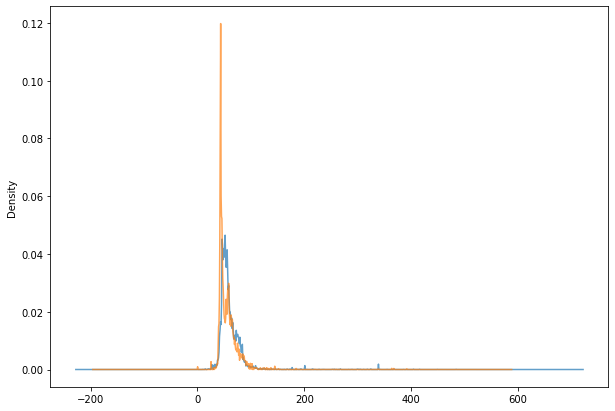

In [21]:
# построим график плотности распределения размера гранул сырья при флотации
pd.Series(train['rougher.input.feed_size']).plot(kind='density', bw_method=0.01, alpha=0.7, figsize=(10, 7))
pd.Series(test['rougher.input.feed_size']).plot(kind='density', bw_method=0.01, alpha=0.7, figsize=(10, 7))


<AxesSubplot:ylabel='Density'>

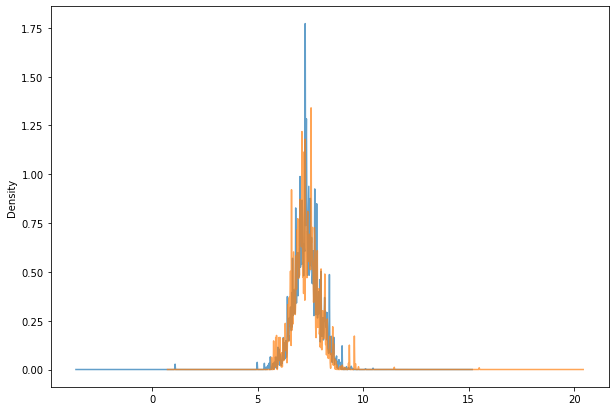

In [22]:
# построим график плотности распределения размера гранул сырья при первичной очистке
pd.Series(train['primary_cleaner.input.feed_size']).plot(kind='density', bw_method=0.01, alpha=0.7, figsize=(10, 7))
pd.Series(test['primary_cleaner.input.feed_size']).plot(kind='density', bw_method=0.01, alpha=0.7, figsize=(10, 7))

Как видим, распределение размеров гранул на обучающей и тестовой выборках не имеют кардинальных различий.

### Исследование суммарной концентрации всех веществ на разных стадиях

In [23]:
concentrate_col = []
for i in full.columns:
    if 'concentrate_' in i:
        concentrate_col.append(i)
        
concentrate_col = pd.Series(concentrate_col)
concentrate_col

0                final.output.concentrate_ag
1                final.output.concentrate_pb
2               final.output.concentrate_sol
3                final.output.concentrate_au
4      primary_cleaner.output.concentrate_ag
5      primary_cleaner.output.concentrate_pb
6     primary_cleaner.output.concentrate_sol
7      primary_cleaner.output.concentrate_au
8              rougher.output.concentrate_ag
9              rougher.output.concentrate_pb
10            rougher.output.concentrate_sol
11             rougher.output.concentrate_au
dtype: object

In [24]:
concentrate = full[concentrate_col]
concentrate.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
0,6.055403,9.889648,5.507324,42.192020,8.547551,10.389648,19.529297,34.174427,11.500771,7.101074,28.029297,19.793808
1,6.029369,9.968944,5.257781,42.701629,8.558743,10.497069,19.369147,34.118526,11.615865,7.278807,28.067063,20.050975
2,6.055926,10.213995,5.383759,42.657501,8.603505,10.354494,19.167579,33.969464,11.695753,7.216833,27.454037,19.737170
3,6.047977,9.977019,4.858634,42.689819,7.221879,8.496563,15.978538,28.260743,11.915047,7.175616,27.341277,19.320810
4,6.148599,10.142511,4.939416,42.774141,9.089428,9.986786,19.199864,33.044932,12.411054,7.240205,27.041023,19.216101


In [25]:
concentrate['rougher'] = (concentrate['rougher.output.concentrate_ag'] + 
                         concentrate['rougher.output.concentrate_pb'] +
                         concentrate['rougher.output.concentrate_sol'] + 
                         concentrate['rougher.output.concentrate_au'])

concentrate['primary_cleaner'] = (concentrate['primary_cleaner.output.concentrate_ag'] + 
                                concentrate['primary_cleaner.output.concentrate_pb'] +
                                concentrate['primary_cleaner.output.concentrate_sol'] + 
                                concentrate['primary_cleaner.output.concentrate_au'])

concentrate['final'] = (concentrate['final.output.concentrate_ag'] +
                      concentrate['final.output.concentrate_pb'] + 
                      concentrate['final.output.concentrate_sol'] + 
                      concentrate['final.output.concentrate_au'])

concentrate = concentrate[['rougher', 'primary_cleaner', 'final']]

concentrate.head()

,rougher,primary_cleaner,final
0,66.424950,72.640924,63.644396
1,67.012710,72.543485,63.957723
2,66.103793,72.095042,64.311180
3,65.752751,59.957723,63.573449
4,65.908382,71.321010,64.004667


In [26]:
concentrate['rougher'].value_counts().head()

0.000000     394
41.115844     11
72.423889      6
67.824055      6
0.040000       5
Name: rougher, dtype: int64

In [27]:
concentrate['primary_cleaner'].value_counts().head()

0.040000     117
0.000000     108
62.032338      6
63.823562      5
59.095131      5
Name: primary_cleaner, dtype: int64

In [28]:
concentrate['final'].value_counts().head()

0.000000     98
64.690452    11
74.112068     7
69.425969     6
68.805134     5
Name: final, dtype: int64

Text(0.5, 1.0, 'Суммарная концентрация веществ на этапе флотации')

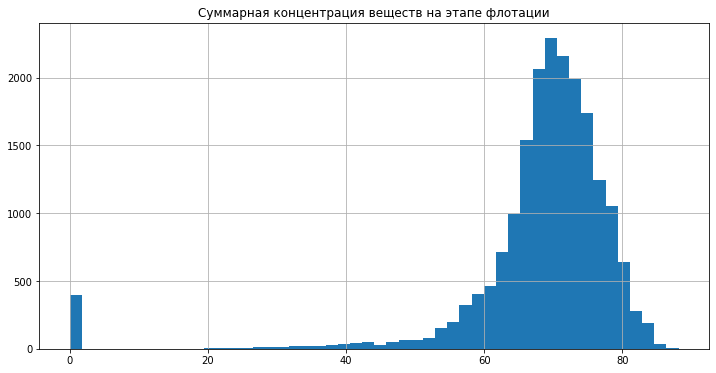

In [29]:
# посмотрим суммарное распределение на этапе флотации
concentrate['rougher'].hist(bins = 50, figsize = (12, 6))
plt.title('Суммарная концентрация веществ на этапе флотации')

Text(0.5, 1.0, 'Суммарная концентрация веществ на этапе первичной очистки')

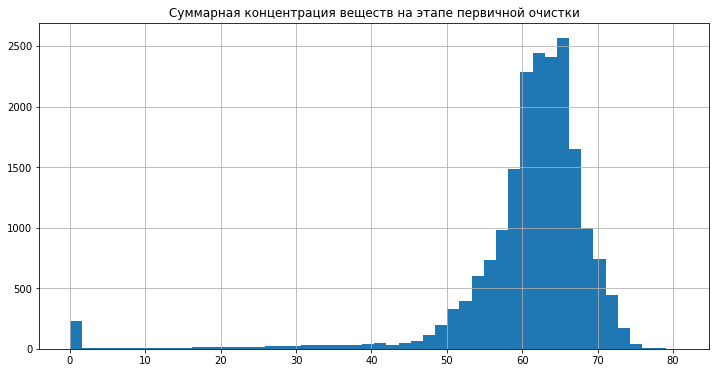

In [30]:
# посмотрим суммарное распределение на этапе первичной очистки 
concentrate['primary_cleaner'].hist(bins = 50, figsize = (12, 6))
plt.title('Суммарная концентрация веществ на этапе первичной очистки')

Text(0.5, 1.0, 'Суммарная концентрация веществ на финальном этапе')

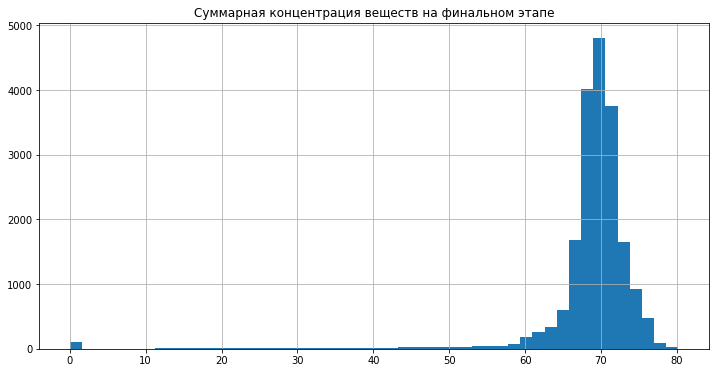

In [31]:
# посмотрим суммарное распределение на финальном этапе
concentrate['final'].hist(bins = 50, figsize = (12, 6))
plt.title('Суммарная концентрация веществ на финальном этапе')

График с каждым этапом становится более узким, разброс значений уменьшается. На финальном этапе концентрация составляет около 70.
На всех трех графиках видим пики около нулевой отметки. Это является аномалией поэтому необходимо удалить строки, где концентрация веществ менее 1, из полной, обучающей и тестовой выборок.

In [32]:
# создадим список индексов строк, которые нужно удалить
index_for_drop = list(concentrate.query('rougher < 1 or primary_cleaner < 1 or final < 1').index)
len(index_for_drop)

717

In [33]:
full = full.drop(index_for_drop, errors='ignore')
full.shape

(18722, 87)

In [34]:
train = train.drop(index_for_drop, errors='ignore')
train.shape

(13725, 55)

In [35]:
#test = test.drop(index_for_drop, errors='ignore')
#test.shape

## Модель

### Функция для вычисления итоговой sMAPE

In [36]:
# функция для вычисления sMAPE
def smape(true, pred):
    error = abs(true - pred)
    scale = (abs(true) + abs(pred)) / 2
    return (error / scale).mean() * 100

In [37]:
# функция для вычисления итоговой sMAPE
def final_smape(rougher, final):
    return 0.25 * rougher + 0.75 * final

In [38]:
# создадим свой скорер, который будем использовать при кроссвалидации 
my_scorer = make_scorer(smape, greater_is_better=False)

### Обучение моделей и выбор лучшей модели

In [39]:
# подготовим признаки обучающей выборки
features_train = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

In [40]:
# разделим целевой признак для двух этапов
target_train_rougher = target_train['rougher.output.recovery']
target_train_final = target_train['final.output.recovery']

In [41]:
features_train.shape, target_train_rougher.shape, target_train_final.shape

((13725, 52), (13725,), (13725,))

In [42]:
# подготовим признаки тестовой выборки
features_test = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

In [43]:
target_test_rougher = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']

In [44]:
features_test.shape, target_test_rougher.shape, target_test_final.shape

((5290, 52), (5290,), (5290,))

In [45]:
target_test.tail(3)

,rougher.output.recovery,final.output.recovery
5287,93.018138,67.092759
5288,92.599042,68.061186
5289,91.177695,71.699976


In [46]:
features_test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

#### Линейная регрессия

In [47]:
# посмотрим какую метрику будет выдавать модель на стандартных гиперпараметрах
model_lr = LinearRegression()
score_lr_rougher = cross_val_score(model_lr, features_train, target_train_rougher, cv=5, scoring=my_scorer).mean()
score_lr_final = cross_val_score(model_lr, features_train, target_train_final, cv=5, scoring=my_scorer).mean()
score_lr = final_smape(score_lr_rougher, score_lr_final)
print('Результат модели Линейная регрессия', score_lr)

Результат модели Линейная регрессия -12.219574044403355


У линейной регрессии немного гиперпараметров, которые можно перебрать. Возьмем полученную метрику в качестве ориентира и сравним с другими моделями.

#### Решающее дерево

In [48]:
# стандартные гиперпараметры
model_dt = DecisionTreeRegressor(random_state=12345)
score_dt_rougher = cross_val_score(model_dt, features_train, target_train_rougher, cv=5, scoring=my_scorer).mean()
score_dt_final = cross_val_score(model_dt, features_train, target_train_final, cv=5, scoring=my_scorer).mean()
score_dt = final_smape(score_dt_rougher, score_dt_final)
print('Результат модели Решающее дерево', score_dt)

Результат модели Решающее дерево -20.546854650851927


In [49]:
%%time
# применим поиск по сетке
# обьявим модель без параметров
model_dt = DecisionTreeRegressor()

# создадим словарь, в который вписываем параметры, которые будем прогонять GridSearch’ем
parametrs = {'max_depth': range (1,13)}

# запустим обучение
grid_dt_rougher = GridSearchCV(model_dt, parametrs, cv=5)
grid_dt_final = GridSearchCV(model_dt, parametrs, cv=5)
grid_dt_rougher.fit(features_train, target_train_rougher)
grid_dt_final.fit(features_train, target_train_rougher)

CPU times: user 39.1 s, sys: 298 ms, total: 39.4 s
Wall time: 40.4 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 13)})

In [50]:
# выведем лучшие гиперпараметры
grid_dt_rougher.best_params_, grid_dt_final.best_params_

({'max_depth': 5}, {'max_depth': 5})

In [51]:
# инициализируем модель с лучшими параметрами
model_dt = DecisionTreeRegressor(random_state=12345, max_depth = 5)
score_dt_rougher = cross_val_score(model_dt, features_train, target_train_rougher, cv=5, scoring=my_scorer).mean()
score_dt_final = cross_val_score(model_dt, features_train, target_train_final, cv=5, scoring=my_scorer).mean()
score_dt = final_smape(score_dt_rougher, score_dt_final)
print('Результат модели Решающее дерево после подбора гиперпараметров', score_dt)

Результат модели Решающее дерево после подбора гиперпараметров -11.716036929428752


Получили метрику чуть лучше, чем у Линейной регрессии и намного лучше, чем у Решающего дерева на стандартных гиперпараметрах.

#### Случайный лес

In [52]:
# стандартные гиперпараметры
#model_rf = RandomForestRegressor(random_state=12345)
#score_rf_rougher = cross_val_score(model_rf, features_train, target_train_rougher, cv=5, scoring=my_scorer).mean()
#score_rf_final = cross_val_score(model_rf, features_train, target_train_final, cv=5, scoring=my_scorer).mean()
#score_rf = final_smape(score_rf_rougher, score_rf_final)
#print('Результат модели Случайный лес', score_rf)


print('Результат-1 модели Случайный лес', -11.668349676733229)
print('Результат-2 модели Случайный лес', -11.668349676733229)

Результат-1 модели Случайный лес -11.668349676733229
Результат-2 модели Случайный лес -11.668349676733229


In [53]:
# снова применим поиск по сетке параметров
#model_rf = RandomForestRegressor()
#parametrs = {'n_estimators': [1, 100], 'max_depth': [1, 12]}
#grid_rf_rougher = GridSearchCV(model_rf, parametrs, cv=5)
#grid_rf_final = GridSearchCV(model_rf, parametrs, cv=5)
#grid_rf_rougher.fit(features_train, target_train_rougher)
#grid_rf_final.fit(features_train, target_train_rougher)

In [54]:
# получили гиперпараметры: глубина 12, количество деревьев 100

#grid_rf_rougher.best_params_, grid_rf_final.best_params_

In [55]:
# инициализируем модель с лучшими параметрами
#model_rf = RandomForestRegressor(random_state=12345, max_depth = 12, n_estimators = 100)
#score_rf_rougher = cross_val_score(model_rf, features_train, target_train_rougher, cv=5, scoring=my_scorer).mean()
#score_rf_final = cross_val_score(model_rf, features_train, target_train_final, cv=5, scoring=my_scorer).mean()
#score_rf = final_smape(score_rf_rougher, score_rf_final)
#print('Результат модели Случайный лес после подбора гиперпараметров', score_rf)

print('Результат-1 модели Случайный лес после подбора гиперпараметров', -11.355497868380732)
print('Результат-2 модели Случайный лес после подбора гиперпараметров', -11.355497868380732)

Результат-1 модели Случайный лес после подбора гиперпараметров -11.355497868380732
Результат-2 модели Случайный лес после подбора гиперпараметров -11.355497868380732


Модель случайный лес показала на данный момент лучшую метрику, но все же улучшение незначительное.

#### CatBoostRegressor

In [56]:
# попробуем применить градиентный бустинг
# получим метрику для первого целевого признака
model_cb_rougher = CatBoostRegressor(random_state=12345)
model_cb_rougher.fit(features_train, target_train_rougher)
model_cb_rougher_pred = model_cb_rougher.predict(features_train)
model_cb_rougher_smape = smape(target_train_rougher, model_cb_rougher_pred)
model_cb_rougher_smape

Learning rate set to 0.061931
0:	learn: 13.8375714	total: 68.5ms	remaining: 1m 8s
1:	learn: 13.5984351	total: 83.7ms	remaining: 41.8s
2:	learn: 13.3765622	total: 98.9ms	remaining: 32.9s
3:	learn: 13.1741388	total: 114ms	remaining: 28.5s
4:	learn: 12.9808794	total: 131ms	remaining: 26s
5:	learn: 12.7493443	total: 145ms	remaining: 24.1s
6:	learn: 12.5849963	total: 161ms	remaining: 22.8s
7:	learn: 12.4237386	total: 176ms	remaining: 21.8s
8:	learn: 12.2728910	total: 191ms	remaining: 21.1s
9:	learn: 12.1453141	total: 206ms	remaining: 20.4s
10:	learn: 11.9912620	total: 221ms	remaining: 19.9s
11:	learn: 11.8834268	total: 236ms	remaining: 19.5s
12:	learn: 11.7588124	total: 251ms	remaining: 19.1s
13:	learn: 11.6510651	total: 265ms	remaining: 18.7s
14:	learn: 11.5205362	total: 283ms	remaining: 18.6s
15:	learn: 11.4028474	total: 297ms	remaining: 18.3s
16:	learn: 11.2948524	total: 312ms	remaining: 18s
17:	learn: 11.2014934	total: 327ms	remaining: 17.8s
18:	learn: 11.1236764	total: 342ms	remaining:

6.457981724300968

In [57]:
# получим метрику для второго целевого признака
model_cb_final = CatBoostRegressor(random_state=12345)
model_cb_final.fit(features_train, target_train_final)
model_cb_final_pred = model_cb_final.predict(features_train)
model_cb_final_smape = smape(target_train_final, model_cb_final_pred)
model_cb_final_smape

Learning rate set to 0.061931
0:	learn: 9.7877860	total: 16.9ms	remaining: 16.9s
1:	learn: 9.6283090	total: 32.3ms	remaining: 16.1s
2:	learn: 9.4788747	total: 48.2ms	remaining: 16s
3:	learn: 9.3324820	total: 64.2ms	remaining: 16s
4:	learn: 9.1981234	total: 79.5ms	remaining: 15.8s
5:	learn: 9.0839399	total: 95.4ms	remaining: 15.8s
6:	learn: 8.9687749	total: 112ms	remaining: 15.9s
7:	learn: 8.8617167	total: 132ms	remaining: 16.4s
8:	learn: 8.7661714	total: 149ms	remaining: 16.4s
9:	learn: 8.6794184	total: 165ms	remaining: 16.3s
10:	learn: 8.6029765	total: 182ms	remaining: 16.3s
11:	learn: 8.5309591	total: 197ms	remaining: 16.2s
12:	learn: 8.4678300	total: 213ms	remaining: 16.2s
13:	learn: 8.3990410	total: 229ms	remaining: 16.1s
14:	learn: 8.3334200	total: 246ms	remaining: 16.1s
15:	learn: 8.2813815	total: 262ms	remaining: 16.1s
16:	learn: 8.2229344	total: 277ms	remaining: 16s
17:	learn: 8.1701427	total: 293ms	remaining: 16s
18:	learn: 8.1207390	total: 310ms	remaining: 16s
19:	learn: 8.07

4.767087858142787

In [58]:
# получим финальную метрику
model_cb_smape_final = final_smape(model_cb_rougher_smape, model_cb_final_smape)
print('Результат модели CatBoostRegressor', model_cb_smape_final)

Результат модели CatBoostRegressor 5.189811324682332


Как видим, модель CatBoostRegressor показала значительно лучший результат даже на стандартных гиперпараметрах. Выберем ее как лучшую модель.

#### Проверка лучшей модели на тестовой выборке

In [59]:
cb_rougher_pred = model_cb_rougher.predict(features_test)
cb_final_pred = model_cb_final.predict(features_test)
cb_rougher_smape = smape(target_test_rougher, cb_rougher_pred)
cb_final_smape = smape(target_test_final, cb_final_pred)
cb_smape = final_smape(cb_rougher_smape, cb_final_smape)
print('Результат лучшей модели', cb_smape)

Результат лучшей модели 9.911055407628876


### Константная модель

In [60]:
# инициализируем константную модель и получим для нее метрику
dummy_regressor_rougher = DummyRegressor(strategy='median')
dummy_regressor_final = DummyRegressor(strategy='median')
dummy_regressor_rougher.fit(features_train, target_train_rougher)
dummy_regressor_final.fit(features_train, target_train_final)
dummy_regressor_rougher_pred = dummy_regressor_rougher.predict(features_test)
dummy_regressor_final_pred = dummy_regressor_final.predict(features_test)
base_smape = final_smape(smape(target_test_rougher, dummy_regressor_rougher_pred), smape(target_test_final, dummy_regressor_final_pred))
print('Результат константной модели', base_smape)

Результат константной модели 9.511609999702376


## Вывод

Была произведена работа с целью предсказания коэффициента восстановления золота из золотосодержащей руды. На этапе предобработки были заполнены пропуски предыдущим известным значением, а также удалены или добавлены некоторые столбцы в тренировочную и тестовую выборки.

Далее был произведен аналих данных, в ходе которого выяснили, что средняя концентрация золота и свинца с каждым последующим этапом растет, а вот средняя концентрация серебра после этапа флотации снижается. Также убедились, что размер гранул сырья в тестовой и тренировочно выборке не имеют кардинальных различий. Были выявлены аномалии в виде нулей в суммарной концентрации веществ, затем аномалии были удалены.

Далее были обучены несколько моделей: линейная регрессия, решающее дерево, случаный лес и CatBoostRegressor. Для моделей решающее дерево и случайный лес был произведен поиск по сетке гиперпараметров, с целью подобрать оптимальные. Качество моделей было проверено с помощью кроссвалидации. Метрикой качества является sMAPE. Лучший результат показала модель CatBoostRegressor. При проверке лучшей модели на тестовой выборке получили результат sMAPE = 9.91.